In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn_extra.cluster import KMedoids
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
import seaborn as sns

In [3]:
df = pd.read_csv('./data_final.csv')
df

,stu_id,credit,sequence,time_a1,time_b1,time_b2,time_b3,time_b4,time_start,time_total,time_answer,time_start_ratio,time_answer_ratio
0,ARE000018904852,0,c,0.0,0.0,0.0,0.0,0.0,8.9,40.8,0.0,0.218137,0.000000
1,ARE000018904861,0,c,0.0,0.0,0.0,0.0,0.0,26.2,58.4,0.0,0.448630,0.000000
2,ARE000018904843,0,c,0.0,0.0,0.0,0.0,0.0,29.8,59.3,0.0,0.502530,0.000000
3,ARE000018904832,0,c,0.0,0.0,0.0,0.0,0.0,34.4,64.8,0.0,0.530864,0.000000
4,ARE000040210135,0,c,0.0,0.0,0.0,0.0,0.0,143.3,181.6,0.0,0.789097,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29371,USA000015004637,1,a1cb2,25.8,0.0,0.0,0.0,11.5,19.8,64.0,37.3,0.309375,0.582812
29372,USA000007902358,1,a1b2,35.9,0.0,0.0,0.0,12.9,24.7,81.3,48.8,0.303813,0.600246
29373,USA000007902371,1,a1c,33.3,0.0,0.0,0.0,0.0,11.9,74.4,33.3,0.159946,0.447581
29374,USA000007902381,1,ca1b2,9.1,0.0,0.0,0.0,5.9,11.3,95.4,15.0,0.118449,0.157233


In [4]:
df[df.isnull().any(axis=1)]

,stu_id,credit,sequence,time_a1,time_b1,time_b2,time_b3,time_b4,time_start,time_total,time_answer,time_start_ratio,time_answer_ratio


In [5]:
df = df[['stu_id','credit','sequence','time_answer_ratio','time_start_ratio']]
df.set_index('stu_id', inplace=True)
df

,credit,sequence,time_answer_ratio,time_start_ratio
stu_id,,,,
ARE000018904852,0,c,0.000000,0.218137
ARE000018904861,0,c,0.000000,0.448630
ARE000018904843,0,c,0.000000,0.502530
ARE000018904832,0,c,0.000000,0.530864
ARE000040210135,0,c,0.000000,0.789097
...,...,...,...,...
USA000015004637,1,a1cb2,0.582812,0.309375
USA000007902358,1,a1b2,0.600246,0.303813
USA000007902371,1,a1c,0.447581,0.159946


In [6]:
df_1 = df[df['credit']==1]
df_0 = df[df['credit']==0]
display(df_1.head())
display(df_0.head())
print(len(df_1), len(df_0))

,credit,sequence,time_answer_ratio,time_start_ratio
stu_id,,,,
ARE000027907117,1,cb1a1b2,0.243341,0.697065
ARE000011302798,1,ca1ca1b2,0.613472,0.113873
ARE000018804820,1,ca1b2,0.516636,0.377079
ARE000039910042,1,cb1ca1b1ca1b2,0.439024,0.220573
ARE000006001557,1,a1cb1a1b2,0.577954,0.092354


,credit,sequence,time_answer_ratio,time_start_ratio
stu_id,,,,
ARE000018904852,0,c,0.0,0.218137
ARE000018904861,0,c,0.0,0.448630
ARE000018904843,0,c,0.0,0.502530
ARE000018904832,0,c,0.0,0.530864
ARE000040210135,0,c,0.0,0.789097


7195 22181


In [7]:
df_ = df[['time_answer_ratio','time_start_ratio']]
df_

,time_answer_ratio,time_start_ratio
stu_id,,
ARE000018904852,0.000000,0.218137
ARE000018904861,0.000000,0.448630
ARE000018904843,0.000000,0.502530
ARE000018904832,0.000000,0.530864
ARE000040210135,0.000000,0.789097
...,...,...
USA000015004637,0.582812,0.309375
USA000007902358,0.600246,0.303813
USA000007902371,0.447581,0.159946


In [8]:
x = df_.to_numpy()
x = RobustScaler().fit_transform(x)
df_scale = pd.DataFrame(x, columns = df_.columns, index = df_.index)
df_scale

,time_answer_ratio,time_start_ratio
stu_id,,
ARE000018904852,0.000000,-0.636321
ARE000018904861,0.000000,0.308239
ARE000018904843,0.000000,0.529118
ARE000018904832,0.000000,0.645234
ARE000040210135,0.000000,1.703472
...,...,...
USA000015004637,1.203226,-0.262429
USA000007902358,1.239218,-0.285222
USA000007902371,0.924037,-0.874788


<AxesSubplot:xlabel='time_answer_ratio', ylabel='Density'>

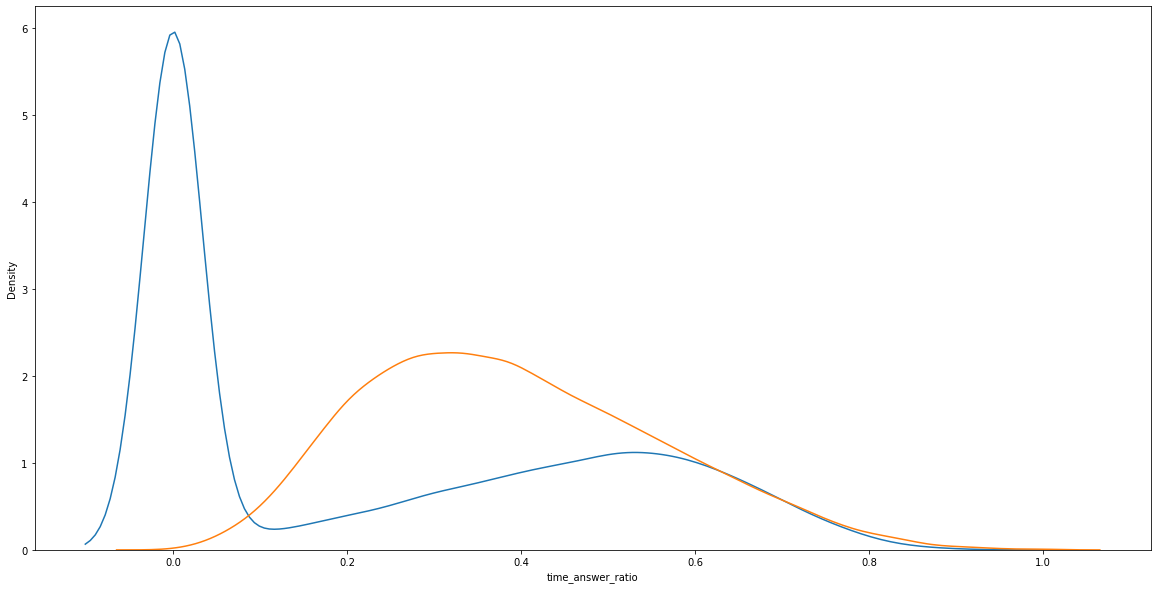

In [9]:
sns.kdeplot(df['time_answer_ratio'])
sns.kdeplot(df['time_start_ratio'])

<AxesSubplot:xlabel='time_answer_ratio', ylabel='Density'>

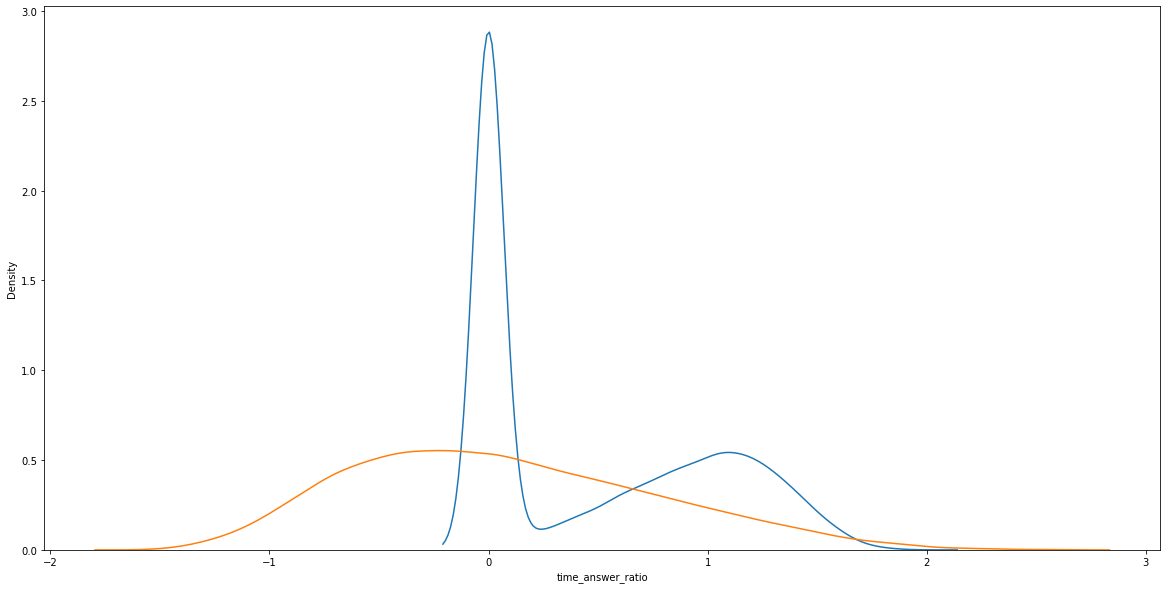

In [10]:
sns.kdeplot(df_scale['time_answer_ratio'])
sns.kdeplot(df_scale['time_start_ratio'])

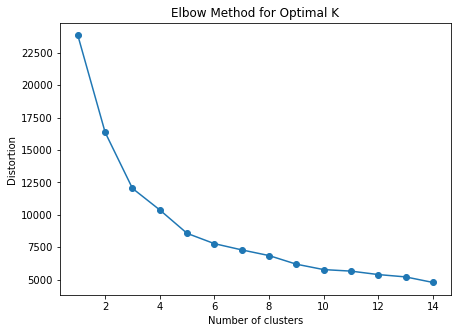

In [11]:
distortions = []
for i in range(1, 15):
    kmedoids = KMedoids(n_clusters=i, random_state=0).fit(x)
    #inertia가 군집 내의 분산을 의미
    distortions.append(kmedoids.inertia_)

# plot
plt.figure(figsize=(7,5))
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show()

In [12]:
num = 5
kmedoids = KMedoids(n_clusters=num, random_state=0).fit(x)
print(kmedoids.labels_)

[3 0 0 ... 4 3 0]


In [13]:
df_scale['cluster'] = kmedoids.labels_
df_scale['credit'] = df['credit']
df_scale

,time_answer_ratio,time_start_ratio,cluster,credit
stu_id,,,,
ARE000018904852,0.000000,-0.636321,3,0
ARE000018904861,0.000000,0.308239,0,0
ARE000018904843,0.000000,0.529118,0,0
ARE000018904832,0.000000,0.645234,0,0
ARE000040210135,0.000000,1.703472,1,0
...,...,...,...,...
USA000015004637,1.203226,-0.262429,4,1
USA000007902358,1.239218,-0.285222,4,1
USA000007902371,0.924037,-0.874788,4,1


# 두 변수 상관이 너무 높음

<AxesSubplot:xlabel='time_start_ratio', ylabel='time_answer_ratio'>

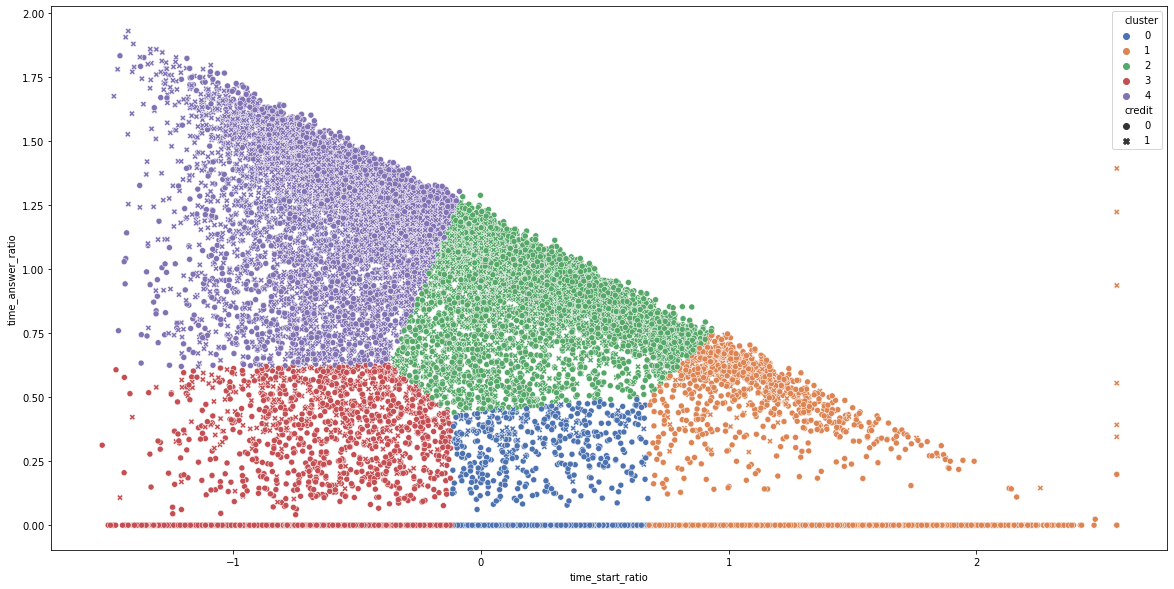

In [14]:
sns.scatterplot(data=df_scale, x="time_start_ratio", y="time_answer_ratio", hue="cluster", style="credit", palette="deep")

Text(0.5, 0, 'time_start_ratio')

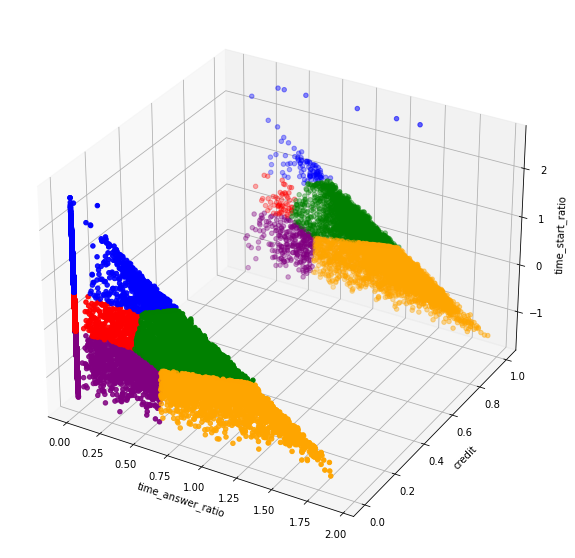

In [15]:
# 3차원 코드 참고
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
colors = ['r','b','g','purple','orange','gray']

for i, color in enumerate(colors):
    x = df_scale[df_scale['cluster'] == i]['time_answer_ratio']
    y = df_scale[df_scale['cluster'] == i]['credit']
    z = df_scale[df_scale['cluster'] == i]['time_start_ratio']
    ax.scatter(x,y,z,c=color,marker='o')

ax.set_xlabel('time_answer_ratio')
ax.set_ylabel('credit')
ax.set_zlabel('time_start_ratio')